# Ariline Customer Satisfaction (Lab 2: DS7331)

SMU Student collaboration:
1. Renfeng Wang
2. Alexander Sepenu
3. Zachary Zaiken
4. Venkata 'MG' Vanga



In continuation of the discussion from Mini Lab, we continue with the Airline customer satisfaction data set for this Lab 2 to focus on more classification models and apply models to a different attribute.

________________________________________________________________________________________________________

## 1. Data Preparation
### Part 1

The code below shows one-hot encoding, PCA and how we split the explanatory variable and response variable. In lab 2, we are still going to use satisfaction attribute as one of our response variable. In addition, we will try to predict whether the customer found the flight to be clean or not, that is predicting the cleanliness attribute as second response variable. Thus, we will have two sets of explanatory variable and response variable.

### A. Response Variable: Satisfaction and expalanatory variables creation

The response variable satisfaction is split to 'neutral or dissatisfied':0 and 'satisfied':1.

The continuous variables 'flight_distance', 'departure_delay_in_minutes', arrival_delay_in_minutes and 'age' are segmented using pandas cut feature as shown below.

These categorical features are further converted by using pandas get_dummy function (one-hot encoding) to use in the final prediction of airline customer satisfaction. Because model algorithm would be more likely to cluster the attribute with 3s and 2s together than the attribute with 3s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering attribute with 3s with 2s is the same as clustering 3s with 1s, and that approach is more reasonable.
The original attributes that got transformed are dropped from the original 'airline_df' dataframe to form 'X_a' dataframe. The response dataframe 'y_a' has the transformed satisfaction data.
Both 'X_a' and 'y_a' are combined into 'airline_df_dummy_satisfied' dataframe that is used for prediction in this scenario A.

The original attributes that got transformed are dropped from the original 'airline_df' dataframe to form 'X_a' dataframe. The response dataframe 'y_a' has the transformed satisfaction data. 

Both 'X_a' and 'y_a' are combined into 'airline_df_dummy_satisfied' dataframe that is used for prediction in this scenario A.


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

airline_df = pd.read_csv('https://raw.githubusercontent.com/wangrenfeng0/Machine-Learning-I/main/airline_passenger_satisfaction.csv') 

if 'Unnamed: 0' in airline_df:
    del airline_df['Unnamed: 0']

airline_df = airline_df.dropna()

Satisfaction ={'neutral or dissatisfied':0,'satisfied':1}
airline_df.satisfaction = [Satisfaction[item] for item in airline_df.satisfaction]

airline_df['flight_range'] = pd.cut(airline_df.flight_distance,[0,750,2000,10000],3,labels=[0,1,2])
airline_df.flight_range = airline_df.flight_range.astype(int)

airline_df['departure_delay_range'] = pd.cut(airline_df.departure_delay_in_minutes,[-1,30,90,1600],3,labels=[0,1,2])
airline_df.departure_delay_range = airline_df.departure_delay_range.astype(int)

airline_df['arrival_delay_range'] = pd.cut(airline_df.arrival_delay_in_minutes,[-1,30,90,1600],3,labels=[0,1,2])
airline_df.arrival_delay_range = airline_df.arrival_delay_range.astype(int)

airline_df['age_range'] = pd.cut(airline_df.age,[0,16,65,120],3,labels=[0,1,2])
airline_df.age_range = airline_df.age_range.astype(int)

X_a = airline_df.drop('satisfaction', axis=1).copy()


y_a= airline_df['satisfaction'].copy()

    
X_a = pd.get_dummies(X_a, columns=['Gender', 'customer_type','type_of_travel','customer_class',
                                       'flight_range','departure_delay_range','arrival_delay_range',
                                       'age_range'])

if 'Gender' in X_a:
    del X_a['Gender'] 
    
if 'customer_type' in X_a:    
    del X_a['customer_type'] 

if 'age' in X_a:    
    del X_a['age'] 
    
if 'type_of_travel' in X_a:    
    del X_a['type_of_travel'] 
    
if 'customer_class' in X_a:    
    del X_a['customer_class'] 
    
if 'flight_distance' in X_a:    
    del X_a['flight_distance'] 

if 'departure_delay_in_minutes' in X_a:    
    del X_a['departure_delay_in_minutes'] 
    
if 'arrival_delay_in_minutes' in X_a:    
    del X_a['arrival_delay_in_minutes'] 

airline_df_dummy_satisfied = pd.concat((X_a,y_a),axis=1)


In [2]:
X_a = X_a.values
y_a= y_a.values
airline_df_dummy_satisfied.head()

,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,...,departure_delay_range_0,departure_delay_range_1,departure_delay_range_2,arrival_delay_range_0,arrival_delay_range_1,arrival_delay_range_2,age_range_0,age_range_1,age_range_2,satisfaction
0,3,4,3,1,5,3,5,5,4,3,...,1,0,0,1,0,0,1,0,0,0
1,3,2,3,3,1,3,1,1,1,5,...,1,0,0,1,0,0,0,1,0,0
2,2,2,2,2,5,5,5,5,4,3,...,1,0,0,1,0,0,0,1,0,1
3,2,5,5,5,2,2,2,2,2,5,...,1,0,0,1,0,0,0,1,0,0
4,3,3,3,3,4,5,5,3,3,4,...,1,0,0,1,0,0,0,1,0,1


### B. Response: Cleanliness variable split and expalanatory variables creation

The response variable in this case is Cleanliness, is split to 0 and 1. Since original Cleanliness is an ordinal variable with 0 (lower) and 5 (highest) rating. Ordinal range 0-2 are considered in unclean - assigned value '0' and Range 3-5 are considered as clean - assigned value '1'.
The continuous variables 'flight_distance', 'departure_delay_in_minutes', arrival_delay_in_minutes and 'age' are segmented using pandas cut feature as shown below.
These categorical features are further converted by using pandas get_dummy function (one hot encoding) to use in the final prediction of airline customer cleanliness response. Because model algorithm would be more likely to cluster the attribute with 3s and 2s together than the attribute with 3s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering attribute with 3s with 2s is the same as clustering 3s with 1s, and that approach is more reasonable.
The original attributes that got transformed are dropped from the original 'airline_df' dataframe to form 'X_b' dataframe. The response dataframe 'y_b' has the transformed cleanliness data.
Both 'X_b' and 'y_b' are combined into 'airline_df_dummy_clean' dataframe that is used for prediction in this scenario B.


In [3]:
airline_df['clean'] = pd.cut(airline_df.cleanliness,[-1,2,6],2,labels=[0,1])
airline_df['clean'] = airline_df['clean'].astype(int)

X_b = airline_df.drop(['clean', 'cleanliness'], axis=1).copy()


y_b= airline_df['clean'].copy()

    
X_b = pd.get_dummies(X_b, columns=['Gender', 'customer_type','type_of_travel','customer_class',
                                       'flight_range','age_range','departure_delay_range','arrival_delay_range',
                                   'satisfaction'])

if 'Gender' in X_b:
    del X_a['Gender'] 
    
if 'customer_type' in X_b:    
    del X_b['customer_type'] 

if 'age' in X_b:    
    del X_b['age'] 
    
if 'type_of_travel' in X_b:    
    del X_b['type_of_travel'] 
    
if 'customer_class' in X_b:    
    del X_b['customer_class'] 
    
if 'flight_distance' in X_b:    
    del X_b['flight_distance'] 

if 'departure_delay_in_minutes' in X_b:    
    del X_b['departure_delay_in_minutes'] 
    
if 'arrival_delay_in_minutes' in X_b:    
    del X_b['arrival_delay_in_minutes'] 

if 'satisfaction' in X_b:    
    del X_b['satisfaction']

airline_df_dummy_clean = pd.concat((X_b,y_b),axis=1)


In [4]:
X_b = X_b.values
y_b= y_b.values
airline_df_dummy_clean.head()

,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,...,age_range_2,departure_delay_range_0,departure_delay_range_1,departure_delay_range_2,arrival_delay_range_0,arrival_delay_range_1,arrival_delay_range_2,satisfaction_0,satisfaction_1,clean
0,3,4,3,1,5,3,5,5,4,3,...,0,1,0,0,1,0,0,1,0,1
1,3,2,3,3,1,3,1,1,1,5,...,0,1,0,0,1,0,0,1,0,0
2,2,2,2,2,5,5,5,5,4,3,...,0,1,0,0,1,0,0,0,1,1
3,2,5,5,5,2,2,2,2,2,5,...,0,1,0,0,1,0,0,1,0,0
4,3,3,3,3,4,5,5,3,3,4,...,0,1,0,0,1,0,0,0,1,1


##### PCA for Satisfaction

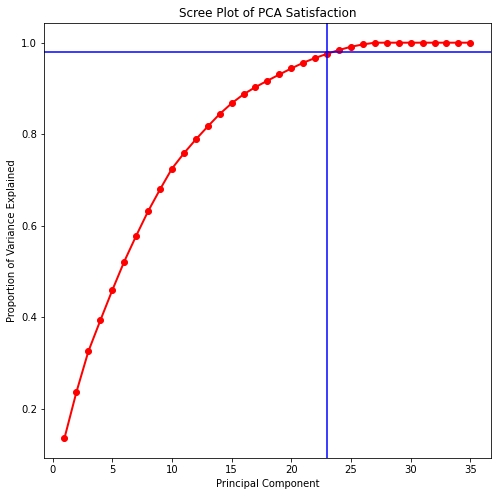

Proportion of Variance Explained using Satisfaction dataframe: 
 [1.35614458e-01 1.00538725e-01 8.88834963e-02 6.75624750e-02
 6.59274616e-02 6.26929137e-02 5.62561505e-02 5.37767648e-02
 4.77785114e-02 4.54748178e-02 3.35461835e-02 3.03326072e-02
 2.84089249e-02 2.72161695e-02 2.33228692e-02 1.98003448e-02
 1.58182963e-02 1.39169255e-02 1.35932383e-02 1.32177064e-02
 1.24715902e-02 1.04606228e-02 9.02991324e-03 8.37031544e-03
 7.05457197e-03 5.12491851e-03 3.80902767e-03 2.67452361e-32
 8.68736757e-33 4.34707992e-33 3.15527560e-33 1.95274444e-33
 7.69488588e-34 6.64359253e-34 2.32669433e-34]

Cumulative Prop. Variance Explained using Satisfaction dataframe: 
            0
0   0.135614
1   0.236153
2   0.325037
3   0.392599
4   0.458527
5   0.521220
6   0.577476
7   0.631252
8   0.679031
9   0.724506
10  0.758052
11  0.788385
12  0.816793
13  0.844010
14  0.867333
15  0.887133
16  0.902951
17  0.916868
18  0.930461
19  0.943679
20  0.956151
21  0.966611
22  0.975641
23  0.984011
24  0.

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()

# Normalize the airline_df_dummy_clean data frame for PCA.
airline_df_dummy_satisfied_scaled = airline_df_dummy_satisfied.drop(['satisfaction'],axis=1).copy()

airline_df_dummy_satisfied_scaled=pd.DataFrame(scaler.fit_transform(airline_df_dummy_satisfied_scaled), 
                                               columns=airline_df_dummy_satisfied_scaled.columns)
#airline_df_dummy_clean_scaled.head()

pca_satisfaction = PCA(n_components=len(airline_df_dummy_satisfied_scaled.columns), svd_solver = 'auto')
Principal_components_satisfaction=pca_satisfaction.fit_transform(airline_df_dummy_satisfied_scaled)


pc_val_satisfaction = np.arange(pca_satisfaction.n_components) + 1
plt.figure(figsize=(8,8))

plt.plot(pc_val_satisfaction, pca_satisfaction.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.title('Scree Plot of PCA Satisfaction')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.axhline(y=0.98, color='b', linestyle='-')
plt.axvline(x=23, color='b', linestyle='-')
plt.show()
print ("Proportion of Variance Explained using Satisfaction dataframe: \n", pca_satisfaction.explained_variance_ratio_)  
    
out_sum_ord = np.cumsum(pca_satisfaction.explained_variance_ratio_)  
out_sum_ord = pd.DataFrame(out_sum_ord)
print ("\nCumulative Prop. Variance Explained using Satisfaction dataframe: \n",out_sum_ord)


Based on the PCA for 'airline_df_dummy_satisfied' dataframe used for cleanliness prediction, approx 98% of the variance can be explained by 23 principal components.

##### PCA for Cleanliness

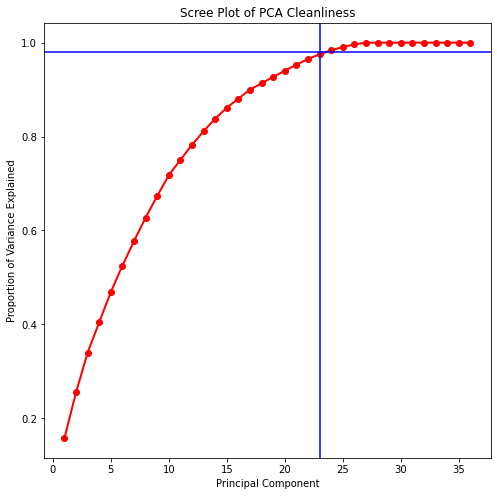

Proportion of Variance Explained using Cleanliness dataframe: 
 [1.57880624e-01 9.77411412e-02 8.43091077e-02 6.49599281e-02
 6.42508678e-02 5.61201623e-02 5.23536024e-02 4.99192934e-02
 4.60198054e-02 4.43488559e-02 3.26146415e-02 3.19582976e-02
 2.89809438e-02 2.68610085e-02 2.30859431e-02 1.96708330e-02
 1.88965879e-02 1.35952131e-02 1.35230421e-02 1.32113742e-02
 1.28024394e-02 1.20541144e-02 1.01675345e-02 8.61180999e-03
 6.65955309e-03 5.69988968e-03 3.70338628e-03 3.11364629e-32
 7.04597910e-33 4.78402055e-33 4.01808922e-33 2.94543046e-33
 1.93198709e-33 1.27241895e-33 4.37055428e-34 1.19685897e-34]

Cumulative Prop. Variance Explained using Cleanliness dataframe: 
            0
0   0.157881
1   0.255622
2   0.339931
3   0.404891
4   0.469142
5   0.525262
6   0.577615
7   0.627535
8   0.673555
9   0.717903
10  0.750518
11  0.782476
12  0.811457
13  0.838318
14  0.861404
15  0.881075
16  0.899972
17  0.913567
18  0.927090
19  0.940301
20  0.953104
21  0.965158
22  0.975325
23  0.

In [6]:
# Normalize the airline_df_dummy_clean data frame for PCA.
airline_df_dummy_clean_scaled = airline_df_dummy_clean.drop(['clean'],axis=1).copy()

airline_df_dummy_clean_scaled=pd.DataFrame(scaler.fit_transform(airline_df_dummy_clean_scaled), 
                                           columns=airline_df_dummy_clean_scaled.columns)
#airline_df_dummy_clean_scaled.head()

pca_clean = PCA(n_components=len(airline_df_dummy_clean_scaled.columns), svd_solver = 'auto')
Principal_components_clean=pca_clean.fit_transform(airline_df_dummy_clean_scaled)

pc_val_clean = np.arange(pca_clean.n_components) + 1
plt.figure(figsize=(8,8))

plt.plot(pc_val_clean, pca_clean.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.title('Scree Plot of PCA Cleanliness')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.axhline(y=0.98, color='b', linestyle='-')
plt.axvline(x=23, color='b', linestyle='-')
plt.show()
print ("Proportion of Variance Explained using Cleanliness dataframe: \n", pca_clean.explained_variance_ratio_)  
    
out_sum_ord = np.cumsum(pca_clean.explained_variance_ratio_)
out_sum_ord = pd.DataFrame(out_sum_ord)
print ("\nCumulative Prop. Variance Explained using Cleanliness dataframe: \n", out_sum_ord)

Based on the PCA for 'airline_df_dummy_clean' dataframe used for cleanliness prediction, approx 98% of the variance can be explained by 23 principal components.


Therefore, from the above PCA analyses 23 principal components are used for both classifications.
______________

### Part 2

We removed 'Gender', 'customer type', 'age', 'Type of travel', 'customer class', as these attributes have been converted by one-hot encoding method. 'flight distance', 'departure delay in minutes' and 'arrival delay in minutes' were also removed as these original attributes were converted to categorical variables

Both 
- Scenario A: Prediction of Satisfaction Variable: 'airline_df_dummy_satisfied' has 36 attributes.
   
   
- Scenario B: Prediction of Cleanliness Variable: 'airline_df_dummy_clean' has 37 attributes.


In [7]:
airline_df_dummy_satisfied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   inflight_wifi_service              129487 non-null  int64
 1   departure_arrival_time_convenient  129487 non-null  int64
 2   ease_of_online_booking             129487 non-null  int64
 3   gate_location                      129487 non-null  int64
 4   food_and_drink                     129487 non-null  int64
 5   online_boarding                    129487 non-null  int64
 6   seat_comfort                       129487 non-null  int64
 7   inflight_entertainment             129487 non-null  int64
 8   onboard_service                    129487 non-null  int64
 9   leg_room_service                   129487 non-null  int64
 10  baggage_handling                   129487 non-null  int64
 11  checkin_service                    129487 non-null  int64
 12  in

_______________________________________________________________

In [8]:
airline_df_dummy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   inflight_wifi_service              129487 non-null  int64
 1   departure_arrival_time_convenient  129487 non-null  int64
 2   ease_of_online_booking             129487 non-null  int64
 3   gate_location                      129487 non-null  int64
 4   food_and_drink                     129487 non-null  int64
 5   online_boarding                    129487 non-null  int64
 6   seat_comfort                       129487 non-null  int64
 7   inflight_entertainment             129487 non-null  int64
 8   onboard_service                    129487 non-null  int64
 9   leg_room_service                   129487 non-null  int64
 10  baggage_handling                   129487 non-null  int64
 11  checkin_service                    129487 non-null  int64
 12  in

_______________________________________________________________

## Modeling and Evaluation 1

### Evaluation Metrics
As we chose to predict the Satisfaction of airlines customers and to predict cleanliness of airplanes from the data, we believe the evaluation metrics described below are significant for both the classifications:

- Accuracy

The accuracy is a basic model evaluation metric to measure the percentage of total true negative and true positive, but it's only a good evaluation metric for balanced data.

- Precision

Precision equals to True positive divided by Total predicted positive. So precision is a good measure to determine, when the costs of False Positive is high.

- Recall

Recall equals to True positive divided by Total actual positive. So recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

- F1 score

F1 score equals to 2 multiply precision times recall divided by the sum of precision and recall. So F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).


Further in analysis we would like to use ROC curves with True Positive Rate (Response) v. False positive rate (Explanatory) to detemine the best algorithm and determine the optimal features for the best algorithm.

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall','f1']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()
    F1avg = scores['test_f1'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"
    print_str4 = "The average F1 for all cv folds is: \t\t\t\t {F1avg:.6}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print(print_str4.format(F1avg=F1avg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    scoresResults['F1'] = scores['test_f1']

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X, y, cv=cv)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(y,predictions)
    confMat = confusion_matrix(y,predictions)
    acc = accuracy_score(y,predictions)
    
    print (classReport)
    print (confMat)
    print (acc)


## Modeling and Evaluation 2

### Cross Validation Method

For both classification tasks and all models, 10-fold stratified K-fold cross validation will be used. Using stratified ensures that the same class split percentages across all test and training splits are the same. This is important as both of these classes are imbalanced (reference histograms below), especially cleanliness. This ensures that for all for modeling training and testing the same percentage split of class is maintained. K fold also ensures that each test set are independent from one another. Other methodologies such as shuffle split will not guarantee that all folds will be different. Using 10-fold ensures the variance and bias tradeoff and will also ensure the model and predictions generated are used responsibly.

##### Cleanliness Histogram

array([<AxesSubplot:title={'center':'clean'}>], dtype=object)

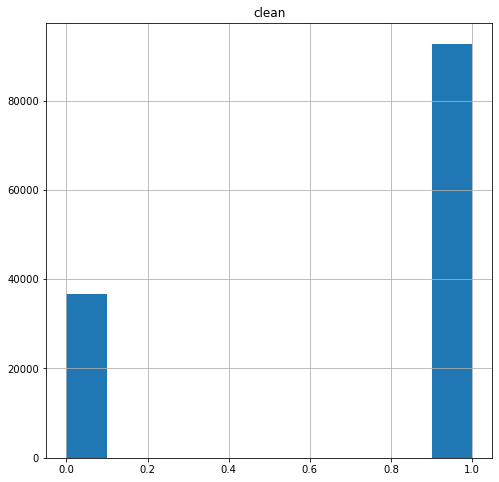

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(1,1,figsize=(8, 8))
airline_df_dummy_clean[['clean']].hist(ax=axis)


##### Satisfaction Histogram

array([<AxesSubplot:title={'center':'satisfaction'}>], dtype=object)

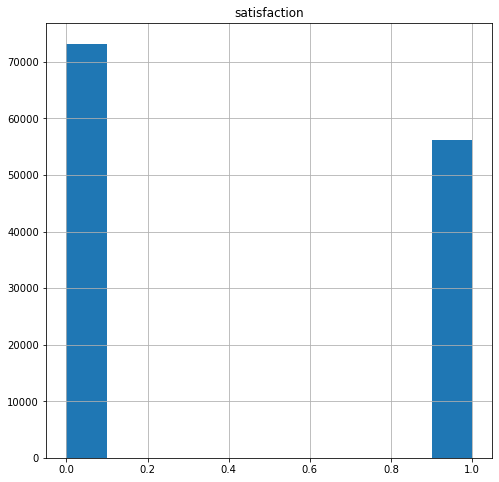

In [11]:
fig, axis = plt.subplots(1,1,figsize=(8, 8))
airline_df_dummy_satisfied[['satisfaction']].hist(ax=axis)

##### Stratified K (10) fold Cross Validation:

In [12]:
#Create Scaler
scl = StandardScaler()

#Split the data
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=5)                     
print(cv)

StratifiedKFold(n_splits=10, random_state=5, shuffle=True)


##### Subsampling for Models  - neural networks, random forests, SVM.

For more complex and computationally expensive models (such as neural networks, random forests, SVM). A trimmed down sub sample of the datasets are created by taking a random sample of 30,000 records.  This is done to ensure that the grid search and tuning of parameters can be done in a timely manner.  Using the full dataset on this can take hours and is not practical use of time or resources.  The sub sampling is large enough to ensure there is enough training data to create and hyper-tune accurate models.	

In [13]:
#Down size the data to 30000 samples for satisfaction classification
model_satisfied = airline_df_dummy_satisfied.sample(n = 30000, random_state=5).copy()
model_satisfied_y = model_satisfied['satisfaction'].copy()
model_satisfied_x = model_satisfied.loc[:, model_satisfied.columns != 'satisfaction'].copy()

model_satisfied_x = model_satisfied_x.values
model_satisfied_y= model_satisfied_y.values

In [14]:
#Down size the data to 30000 samples for ease_of_online_booking classification
model_clean = airline_df_dummy_clean.sample(n = 30000, random_state=5).copy()
model_clean_y = model_clean['clean'].copy()
model_clean_x = model_clean.loc[:, model_clean.columns != 'clean'].copy()

model_clean_x = model_clean_x.values
model_clean_y= model_clean_y.values

## Modeling and Evaluation 3

### A. Satisfaction Classifcation Models

##### LogisticRegression

We listed the following parameters in our grid search for us to adjust by using our chosen metric to increase generalization performance.

In penalty parameter L1 Lasso and L2 Ridge regularization methods are listed.
We also listed two solvers 'liblinear' and 'saga' as both of them can be work under L1 and L2 regularization. 'sage' solver works faster in large data set.

We listed different values for parameter C to tune from stronger to weaker regularization.

We also give options to check if we need 'balanced' option and how many maximum iterations we need in our parameters.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#Create Pipeline for scaler, PCA and model classifier


regEstimator = LogisticRegression()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = { 'clf__penalty':['l2','l1']
              ,'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'clf__class_weight': ['balanced','none']
              ,'clf__random_state': [5]
              ,'clf__solver': ['liblinear','saga']
              ,'clf__max_iter':[100,500]
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(X_a, y_a)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   28.3s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  2.1min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  4.7min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  8.5min
[Parallel(n_jobs=7)]: Done 1120 out of 1120 | elapsed: 12.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', LogisticRegression())]),
             n_jobs=7,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'clf__class_weight': ['balanced', 'none'],
                         'clf__max_iter': [100, 500],
                         'clf__penalty': ['l2', 'l1'], 'clf__random_state': [5],
                         'clf__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [16]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf',
                 LogisticRegression(C=0.01, class_weight='none', penalty='l1',
                                    random_state=5, solver='saga'))])

In [17]:
classifierEst_1 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_1, X_a, y_a, cv)

The average accuracy for all cv folds is: 			 0.87246
The average precision for all cv folds is: 			 0.86766
The average recall for all cv folds is: 			 0.83362
The average F1 for all cv folds is: 				 0.850291
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.873504,0.871322,0.831674,0.851037
1,0.875898,0.871923,0.837362,0.854293
2,0.874044,0.865107,0.841273,0.853023
3,0.874122,0.870686,0.834163,0.852033
4,0.870878,0.868156,0.828653,0.847945
5,0.871728,0.867631,0.831704,0.849288
6,0.871264,0.863703,0.835614,0.849426
7,0.868783,0.865031,0.827053,0.845616
8,0.876815,0.871247,0.840739,0.855721
9,0.867547,0.861795,0.827942,0.844529


##### Random Forest

We listed the following parameters in our grid search for us to adjust by using our chosen metric to increase generalization performance.

We listed 100, 150 and 200 in n_estimators to indicate different number of trees in the forest.

We also give options to check if we need 'balanced' option our parameter.

We want to test both 'gini' and 'entropy' functions in our model and we list three different numbers (10, 20 and 50) for the maximum depth of the tree.


In [18]:
regEstimator = RandomForestClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__criterion': ['gini','entropy']
              ,'clf__random_state': [5]
              ,'clf__max_depth': [10,20,50]
              ,'clf__n_estimators':[100,150,200]
              ,'clf__class_weight':['balanced','none']
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_satisfied_x, model_satisfied_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  2.3min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed: 15.3min
[Parallel(n_jobs=7)]: Done 360 out of 360 | elapsed: 16.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=7,
             param_grid={'clf__class_weight': ['balanced', 'none'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20, 50],
                         'clf__n_estimators': [100, 150, 200],
                         'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [19]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=50,
                                        n_estimators=200, random_state=5))])

In [20]:
classifierEst_3 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_3, X_a, y_a, cv)

The average accuracy for all cv folds is: 			 0.92956
The average precision for all cv folds is: 			 0.945
The average recall for all cv folds is: 			 0.88968
The average F1 for all cv folds is: 				 0.916497
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.931346,0.950885,0.887842,0.918283
1,0.934358,0.952444,0.893530,0.922047
2,0.930188,0.943630,0.892641,0.917428
3,0.930574,0.945187,0.891930,0.917787
4,0.928257,0.944707,0.886776,0.914825
5,0.927794,0.945330,0.885019,0.914181
6,0.927408,0.942922,0.886618,0.913904
7,0.924930,0.938891,0.884820,0.911054
8,0.932654,0.943801,0.898507,0.920597
9,0.928097,0.942174,0.889086,0.914861


##### Support Vector Machine

We only want SVM to run model under radial basis function kernel and we set the degree of polynomial kernel function to 3.

We listed different kernel coefficient in gamma parameter, 'scale' means it uses 1 / (n_features * X.var()) and 'auto' means it uses 1 / n_features.

We listed different values for parameter C to tune from stronger to weaker regularization.


In [21]:
regEstimator = SVC()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'clf__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
              'clf__kernel':['rbf'], 
              'clf__degree':[3], 
              'clf__random_state':[5],
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_satisfied_x, model_satisfied_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.0min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed: 35.5min
[Parallel(n_jobs=7)]: Done 360 out of 360 | elapsed: 79.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', SVC())]),
             n_jobs=7,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__degree': [3],
                         'clf__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
                         'clf__kernel': ['rbf'], 'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [22]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf', SVC(C=10, random_state=5))])

In [23]:
classifierEst_4 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_4, model_satisfied_x, model_satisfied_y, cv)

The average accuracy for all cv folds is: 			 0.9369
The average precision for all cv folds is: 			 0.94046
The average recall for all cv folds is: 			 0.91462
The average F1 for all cv folds is: 				 0.927356
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.930333,0.932348,0.907646,0.919831
1,0.941000,0.940678,0.924300,0.932417
2,0.937667,0.940902,0.915973,0.928270
3,0.939000,0.948031,0.911431,0.929371
4,0.936333,0.941406,0.912188,0.926567
5,0.932667,0.936768,0.908403,0.922367
6,0.935667,0.939252,0.912945,0.925912
7,0.933667,0.934884,0.912945,0.923784
8,0.934000,0.939063,0.909228,0.923905
9,0.948667,0.951314,0.931165,0.941131


##### Decision Tree Model

We listed the following parameters in our grid search for us to adjust by using our chosen metric to increase generalization performance. The decision tree model follows the same approach as the the random forest model.

We give options to check if we need 'balanced' option our parameter.

We want to test both 'gini' and 'entropy' functions in our model and we list three different numbers (10, 20 and 50) for the maximum depth of the tree.


In [24]:

regEstimator = DecisionTreeClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__criterion': ['gini','entropy']
              ,'clf__random_state': [5]
              ,'clf__max_depth': [10,20,50]
              ,'clf__class_weight':['balanced','none']}

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_satisfied_x, model_satisfied_y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   13.9s
[Parallel(n_jobs=7)]: Done 120 out of 120 | elapsed:   27.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=7,
             param_grid={'clf__class_weight': ['balanced', 'none'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20, 50],
                         'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [25]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        random_state=5))])

In [26]:
classifierEst_5 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_5, model_satisfied_x, model_satisfied_y, cv)

The average accuracy for all cv folds is: 			 0.88383
The average precision for all cv folds is: 			 0.88719
The average recall for all cv folds is: 			 0.84363
The average F1 for all cv folds is: 				 0.864758
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.877000,0.874214,0.841787,0.857694
1,0.892000,0.879665,0.874338,0.876993
2,0.881333,0.883241,0.841787,0.862016
3,0.876667,0.894606,0.816048,0.853523
4,0.877333,0.884584,0.829674,0.856250
5,0.881000,0.880727,0.844058,0.862002
6,0.890667,0.905306,0.839516,0.871170
7,0.893667,0.898251,0.855413,0.876309
8,0.882000,0.884127,0.842663,0.862897
9,0.886667,0.887224,0.850983,0.868726


### B. Cleanliness Classification Models

All the models for Cleanliness classification follow the same approach as discussed for the Satisfaction classification.

##### Logistic Regression

In [27]:

regEstimator = LogisticRegression()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = { 'clf__penalty':['l2','l1']
              ,'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'clf__class_weight': ['balanced','none']
              ,'clf__random_state': [5]
              ,'clf__solver': ['liblinear','saga']
              ,'clf__max_iter':[100,500]
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')

regGridSearch.fit(X_b, y_b)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   27.2s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  2.0min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  4.7min
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:  8.4min
[Parallel(n_jobs=7)]: Done 1120 out of 1120 | elapsed: 12.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', LogisticRegression())]),
             n_jobs=7,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'clf__class_weight': ['balanced', 'none'],
                         'clf__max_iter': [100, 500],
                         'clf__penalty': ['l2', 'l1'], 'clf__random_state': [5],
                         'clf__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [28]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf',
                 LogisticRegression(C=0.001, class_weight='none', penalty='l1',
                                    random_state=5, solver='saga'))])

In [29]:
classifierEst_6 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_6, X_b, y_b, cv)

The average accuracy for all cv folds is: 			 0.90089
The average precision for all cv folds is: 			 0.91009
The average recall for all cv folds is: 			 0.95609
The average F1 for all cv folds is: 				 0.932521
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.903622,0.911261,0.958814,0.934433
1,0.901691,0.911118,0.956011,0.933025
2,0.901151,0.909790,0.956873,0.932738
3,0.903159,0.913070,0.955795,0.933944
4,0.899992,0.911671,0.952663,0.931716
5,0.898525,0.906703,0.956761,0.931060
6,0.900070,0.907559,0.958055,0.932123
7,0.897899,0.909306,0.952448,0.930377
8,0.900680,0.909557,0.956437,0.932408
9,0.902147,0.910826,0.957084,0.933382


##### Random Forest

In [30]:

regEstimator = RandomForestClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__criterion': ['gini','entropy']
              ,'clf__random_state': [5]
              ,'clf__max_depth': [10,20,50]
              ,'clf__n_estimators':[100,150,200]
              ,'clf__class_weight':['balanced','none']
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_clean_x, model_clean_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.9min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed: 13.6min
[Parallel(n_jobs=7)]: Done 360 out of 360 | elapsed: 14.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=7,
             param_grid={'clf__class_weight': ['balanced', 'none'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20, 50],
                         'clf__n_estimators': [100, 150, 200],
                         'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [31]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        n_estimators=200, random_state=5))])

In [32]:
classifierEst_8 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_8, X_b, y_b, cv)

The average accuracy for all cv folds is: 			 0.90426
The average precision for all cv folds is: 			 0.92179
The average recall for all cv folds is: 			 0.94666
The average F1 for all cv folds is: 				 0.934054
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.905784,0.921243,0.949650,0.935230
1,0.907869,0.924297,0.949111,0.936539
2,0.904626,0.921384,0.947709,0.934361
3,0.904549,0.923506,0.945013,0.934136
4,0.902464,0.922833,0.942635,0.932629
5,0.903081,0.917700,0.949860,0.933503
6,0.903236,0.918589,0.948997,0.933545
7,0.900834,0.921948,0.941234,0.931491
8,0.904310,0.922761,0.945547,0.934015
9,0.905854,0.923635,0.946841,0.935094


##### Support Vector Machine

In [33]:

regEstimator = SVC()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'clf__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
              'clf__kernel':['rbf'], 
              'clf__degree':[3],
              'clf__random_state':[5],
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_clean_x, model_clean_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  6.8min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed: 29.5min
[Parallel(n_jobs=7)]: Done 360 out of 360 | elapsed: 75.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', SVC())]),
             n_jobs=7,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__degree': [3],
                         'clf__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
                         'clf__kernel': ['rbf'], 'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [34]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf', SVC(C=10, gamma=0.01, random_state=5))])

In [35]:
classifierEst_9 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_9, model_clean_x, model_clean_y, cv)

The average accuracy for all cv folds is: 			 0.91453
The average precision for all cv folds is: 			 0.91616
The average recall for all cv folds is: 			 0.96948
The average F1 for all cv folds is: 				 0.942048
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.916333,0.915173,0.973488,0.943430
1,0.914667,0.911739,0.975349,0.942472
2,0.920667,0.917467,0.977209,0.946396
3,0.910000,0.912643,0.966977,0.939024
4,0.914333,0.919362,0.965116,0.941684
5,0.913333,0.915896,0.967892,0.941176
6,0.920667,0.928668,0.963239,0.945637
7,0.912000,0.914650,0.967427,0.940299
8,0.913667,0.915202,0.969288,0.941469
9,0.909667,0.910761,0.968823,0.938895


##### Decision Tree Model

In [36]:

regEstimator = DecisionTreeClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__criterion': ['gini','entropy']
              ,'clf__random_state': [5]
              ,'clf__max_depth': [10,20,50]
              ,'clf__class_weight':['balanced','none']}

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(X_b, y_b)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  1.2min
[Parallel(n_jobs=7)]: Done 120 out of 120 | elapsed:  2.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=7,
             param_grid={'clf__class_weight': ['balanced', 'none'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20, 50],
                         'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [37]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=50,
                                        random_state=5))])

In [38]:
classifierEst_10 = regGridSearch.best_estimator_
EvaluateClassifierEstimator(classifierEst_10, X_b, y_b, cv)

The average accuracy for all cv folds is: 			 0.87341
The average precision for all cv folds is: 			 0.91196
The average recall for all cv folds is: 			 0.91123
The average F1 for all cv folds is: 				 0.911591
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.874739,0.909120,0.916765,0.912927
1,0.871419,0.912153,0.907925,0.910034
2,0.865858,0.907107,0.905445,0.906275
3,0.874353,0.912959,0.911482,0.912220
4,0.872577,0.915703,0.905435,0.910540
5,0.875512,0.912113,0.914276,0.913193
6,0.871573,0.909855,0.910934,0.910394
7,0.872490,0.911121,0.910826,0.910973
8,0.873803,0.911549,0.912336,0.911942
9,0.881758,0.917953,0.916864,0.917408


________________________________________

## Neural Network Classifier

In addition to the logistic regression, random forest, support vector machine and decision tree models that were done for flight satisfaction and cleanliness, a neural network classifier was used in an attempt to maximize model accuracy. The model used is from the sklearn.neural_network module. In the code below we will utilize MLPClassifier() the Multi-layer Perceptron classifier.  This model works by optimizing the log-loss function using LBFGS or stochastic gradient descent.  In addition, the model trains iteratively.  MLPClassifier relies on an underlying Neural Network to perform classification tasks. 

The code below shows the steps to hypertune a neural network MLPClassifier using gridsearchCV, as well as the results of a 10-fold cross validation for accuracy, precision and recall.  The results of the model as well as its comparison against the 4 previous model will be explored in the subsequent sections of the report.


We listed the following parameters in our grid search for us to adjust by using our chosen metric to increase generalization performance.


We list all possible solvers to tune our model, the solvers we use are lbfgs’, ‘sgd’ and ‘adam’. ‘lbfgs’ is an optimizer in the family of quasi-Newton methods. ‘sgd’ refers to stochastic gradient descent and ‘adam’ refers to a stochastic gradient-based optimizer proposed by a group of people.


We also list different values of alpha to tune L2 regularization parameter and two options of learning rate: 'constant' and 'invscaling'.


The maximum literation are set to 200 and 500.


In [39]:
# MLPClassifier
regEstimator = MLPClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),\
])

parameters = { 'clf__alpha': [0.01, 1, 10, 100, 1000]
              ,'clf__random_state': [5]
              ,'clf__solver': ['lbfgs','sgd', 'adam']
              ,'clf__learning_rate':['constant', 'invscaling']
              ,'clf__max_iter':[200,500]
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')

#X_scaled_satisfied = scl.transform(model_satisfied_x)
regGridSearch.fit(model_satisfied_x, model_satisfied_y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  6.1min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed: 27.0min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed: 48.1min
[Parallel(n_jobs=7)]: Done 600 out of 600 | elapsed: 56.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', MLPClassifier())]),
             n_jobs=7,
             param_grid={'clf__alpha': [0.01, 1, 10, 100, 1000],
                         'clf__learning_rate': ['constant', 'invscaling'],
                         'clf__max_iter': [200, 500], 'clf__random_state': [5],
                         'clf__solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=1)

In [40]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf',
                 MLPClassifier(alpha=10, random_state=5, solver='lbfgs'))])

In [41]:
classifierEst_2 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_2, X_a, y_a, cv)

The average accuracy for all cv folds is: 			 0.94999
The average precision for all cv folds is: 			 0.95445
The average recall for all cv folds is: 			 0.92928
The average F1 for all cv folds is: 				 0.941686
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.951656,0.956538,0.931034,0.943614
1,0.952043,0.956244,0.932279,0.944109
2,0.947486,0.948495,0.929613,0.938959
3,0.950961,0.953480,0.932634,0.942942
4,0.949726,0.957850,0.924991,0.941134
5,0.948259,0.953522,0.926071,0.939596
6,0.948799,0.957934,0.922694,0.939984
7,0.949490,0.954147,0.928368,0.941081
8,0.953197,0.955040,0.936367,0.945611
9,0.948332,0.951211,0.928724,0.939833


In [42]:
# MLPClassifier
regEstimator = MLPClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=23, svd_solver='auto')),
    ('clf', regEstimator),\
])

parameters = { 'clf__alpha': [0.01, 1, 10, 100, 1000]
              ,'clf__random_state': [5]
              ,'clf__solver': ['lbfgs','sgd', 'adam']
              ,'clf__learning_rate':['constant', 'invscaling']
              ,'clf__max_iter':[200,500]
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')

regGridSearch.fit(model_clean_x, model_clean_y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  6.1min
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed: 25.7min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed: 46.1min
[Parallel(n_jobs=7)]: Done 600 out of 600 | elapsed: 54.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=23)),
                                       ('clf', MLPClassifier())]),
             n_jobs=7,
             param_grid={'clf__alpha': [0.01, 1, 10, 100, 1000],
                         'clf__learning_rate': ['constant', 'invscaling'],
                         'clf__max_iter': [200, 500], 'clf__random_state': [5],
                         'clf__solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=1)

In [43]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=23)),
                ('clf',
                 MLPClassifier(alpha=10, max_iter=500, random_state=5,
                               solver='lbfgs'))])

In [44]:
classifierEst_7 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_7, X_b, y_b, cv)

The average accuracy for all cv folds is: 			 0.91422
The average precision for all cv folds is: 			 0.9295
The average recall for all cv folds is: 			 0.95248
The average F1 for all cv folds is: 				 0.940848
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall,F1
0,0.915051,0.928504,0.954933,0.941533
1,0.909568,0.925184,0.950620,0.937729
2,0.915978,0.931303,0.952992,0.942023
3,0.915746,0.932467,0.951267,0.941773
4,0.917136,0.933502,0.952124,0.942721
5,0.913043,0.925616,0.955359,0.940253
6,0.914588,0.929172,0.953418,0.941139
7,0.908326,0.925408,0.948458,0.936791
8,0.914736,0.930635,0.951909,0.941151
9,0.917980,0.933214,0.953742,0.943366


## Modeling and Evaluation 4

We chose to use ROC curve as our visualization tools to bolster our analysis. The ROC curve is created by plotting the true positive rate (recall) against the false positive rate (FPR) at various threshold settings. And the area under the curve (AUC) can help us compare different models easily. Therefore, ROC curve and AUC can not only help us to choose the optimal threshold value, but also help us determine which model yields the best prediction result.

Unlike we used recall and precision as our evaluation metrics previously, we will keep recall (True positive rate) as response, but use false positive rate as explanatory feature to draw ROC curve below.

Below are the ROC curves for all the models considering Satisfaction as the predicted feature. We can observe from the AUC of the ROC that Random Forest classifer and Neural network classifier highest AUC (approx. 0.99).

In [93]:
# ROC for all models for satisfaction classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


classifiers_a = [LogisticRegression(C=1000, class_weight='balanced',
                                    random_state=5, solver='liblinear'), 
               DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=50,
                                        random_state=5),
               RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=50,n_jobs=7,
                                        n_estimators=200, random_state=5),
               SVC(C=1, gamma='auto',degree=3,kernel='rbf',random_state=5,probability=True),
               MLPClassifier(alpha=100, max_iter=500, random_state=5,
                               solver='lbfgs')]

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, random_state=5, test_size=0.2)
scaler_a = preprocessing.StandardScaler().fit(X_train_a)
X_train_scaled_a = scaler_a.transform(X_train_a)
X_test_scaled_a = scaler_a.transform(X_test_a)

result_table_a = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','thresholds'])
thresholds_a=pd.DataFrame(columns=['thresholds','classifiers'])

# Train the models and record the results
for cls in classifiers_a:
    model_a = cls.fit(X_train_scaled_a, y_train_a)
    yhat_a = model_a.predict_proba(X_test_scaled_a)[::,1]
    
    fpr, tpr, thresholds = roc_curve(y_test_a,  yhat_a)
    auc = roc_auc_score(y_test_a, yhat_a)
    
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds': pd.Series(thresholds, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    
    result_table_a = result_table_a.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    thresholds_a = thresholds_a.append({'classifiers':cls.__class__.__name__, 'thresholds':roc_t['thresholds']},
                                       ignore_index=True)


# Set name of the classifiers as index labels
result_table_a.set_index('classifiers', inplace=True)

In [95]:
from tabulate import tabulate
print(tabulate(thresholds_a,headers='keys', tablefmt='psql'))

+----+--------------+------------------------+
|    |   thresholds | classifiers            |
|----+--------------+------------------------|
|  0 |     0.47503  | LogisticRegression     |
|  1 |     0.567126 | DecisionTreeClassifier |
|  2 |     0.385    | RandomForestClassifier |
|  3 |     0.306452 | SVC                    |
|  4 |     0.359119 | MLPClassifier          |
+----+--------------+------------------------+


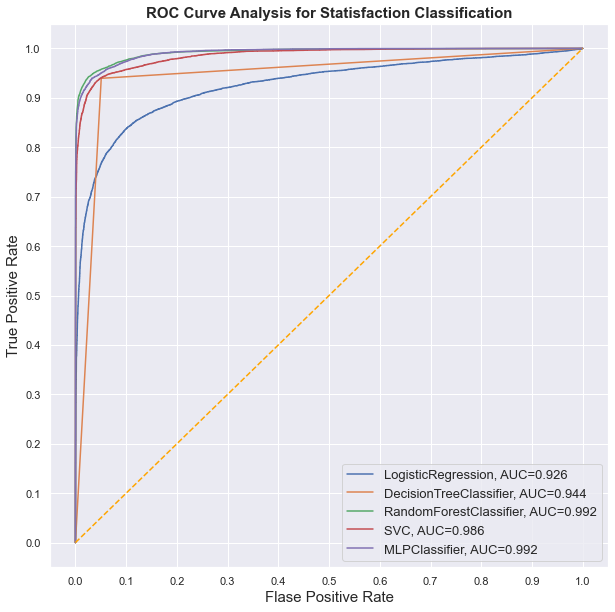

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = plt.figure(figsize=(10,10))

for i in result_table_a.index:
    plt.plot(result_table_a.loc[i]['fpr'], 
             result_table_a.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table_a.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Statisfaction Classification', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Below are the ROC curves for all the models considering Cleanliness as predicted feature. We can observe from the AUC of the ROC that Random Forest classifer and Neural network classifier highest AUC (approx. 0.97). 

In [ ]:
# ROC for all models for cleanliness classification

classifiers_b = [LogisticRegression(C=1000, class_weight='balanced',
                                    random_state=5, solver='liblinear'), 
               DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=50,
                                        random_state=5),
               RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=50,n_jobs=7,
                                        n_estimators=200, random_state=5),
               SVC(C=1, gamma='auto',degree=3,kernel='rbf',random_state=5,probability=True),
               MLPClassifier(alpha=100, max_iter=500, random_state=5,
                               solver='lbfgs')]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, random_state=5, test_size=0.2)
scaler_b = preprocessing.StandardScaler().fit(X_train_b)
X_train_scaled_b = scaler_b.transform(X_train_b)
X_test_scaled_b = scaler_b.transform(X_test_b)

result_table_b = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','thresholds'])
thresholds_b=pd.DataFrame(columns=['thresholds','classifiers'])

# Train the models and record the results
for cls in classifiers_b:
    model_b = cls.fit(X_train_scaled_b, y_train_b)
    yhat_b = model_b.predict_proba(X_test_scaled_b)[::,1]
    
    fpr, tpr, thresholds  = roc_curve(y_test_b,  yhat_b)
    auc = roc_auc_score(y_test_b, yhat_b)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    
    result_table_b = result_table_b.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    thresholds_b = thresholds_a.append({'classifiers':cls.__class__.__name__, 'thresholds':roc_t['thresholds']},
                                       ignore_index=True)


# Set name of the classifiers as index labels
result_table_b.set_index('classifiers', inplace=True)

In [ ]:
print(tabulate(thresholds_b,headers='keys', tablefmt='psql'))

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in result_table_b.index:
    plt.plot(result_table_b.loc[i]['fpr'], 
             result_table_b.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table_b.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Cleanliness Classification', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Modeling and Evaluation 5

### Summary:

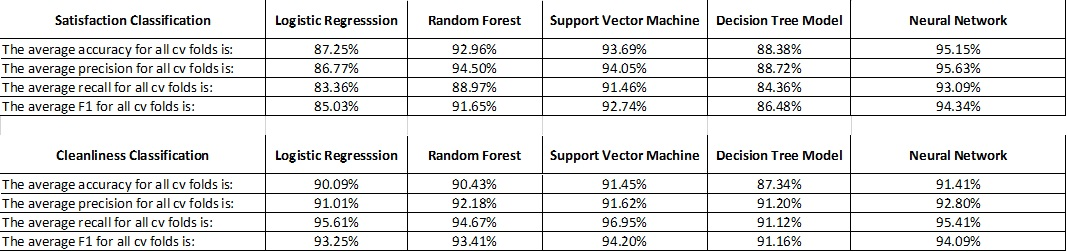

In [49]:
#Satisfaction classification shows Random Forest and MLP classifers have top two accuracies 
from mlxtend.evaluate import paired_ttest_5x2cv

clf1_a = RandomForestClassifier(class_weight='balanced', max_depth=20,n_jobs=7, n_estimators=200, random_state=5)
clf2_a = MLPClassifier(alpha=10, max_iter=500, random_state=5, solver='lbfgs')

score1_a = clf1_a.fit(X_train_scaled_a, y_train_a).score(X_test_scaled_a, y_test_a)
score2_a = clf2_a.fit(X_train_scaled_a, y_train_a).score(X_test_scaled_a, y_test_a)

print('Random Forest accuracy: %.2f%%' % (score1_a*100))
print('Multi-layer Perceptron accuracy: %.2f%%' % (score2_a*100))

Random Forest accuracy: 95.93%
Multi-layer Perceptron accuracy: 95.59%


In [50]:
t, p = paired_ttest_5x2cv(estimator1=clf1_a, estimator2=clf2_a, X=X_a, y=y_a, random_seed=5)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 2.278
p value: 0.072


Paired t test carried out for the satisfaction classification using Random forest and Neural netowork shows a two sided p-value of 0.072 (>0.05) this suggestes that there is not enough evidence to suggest that the accuracies for Random forest and neural networks are different.

In [51]:
#Cleanliness classification shows Random Forest and MLP classifers have top two accuracies
clf1_b = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=50,n_jobs=7, n_estimators=150, random_state=5)
clf2_b = MLPClassifier(alpha=100, max_iter=500, random_state=5, solver='lbfgs')

score1_b = clf1_b.fit(X_train_scaled_b, y_train_b).score(X_test_scaled_b, y_test_b)
score2_b = clf2_b.fit(X_train_scaled_b, y_train_b).score(X_test_scaled_b, y_test_b)

print('Random Forest accuracy: %.2f%%' % (score1_b*100))
print('Multi-layer Perceptron accuracy: %.2f%%' % (score2_b*100))

Random Forest accuracy: 92.07%
Multi-layer Perceptron accuracy: 91.90%


In [52]:
t, p = paired_ttest_5x2cv(estimator1=clf1_b, estimator2=clf2_b, X=X_b, y=y_b, random_seed=5)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 4.675
p value: 0.005


Paired t test carried out for the cleanliness classification using Random forest and Neural netowork shows a two sided p-value of 0.005 (<0.05) this suggestes that there is enough evidence to suggest that the accuracies for Random forest and neural networks are different.

## Modeling and Evaluation 6

#### Satisfaction Classification Important features


In [53]:
scaler = StandardScaler()
scaler.fit(X_a)

#Transform training data to z-scores
#This makes our model's coefficients take on the same scale for accurate feature importance analisys 
X_a_Scl = scaler.transform(X_a)

regEstimator_a = RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=200, random_state=5)
regEstimator_a.fit(X_a_Scl, y_a)

RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=200,
                       random_state=5)

In [54]:
weights = regEstimator_a.feature_importances_.ravel()
feature_names = airline_df_dummy_satisfied.drop('satisfaction', axis=1).copy().columns.values                  
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

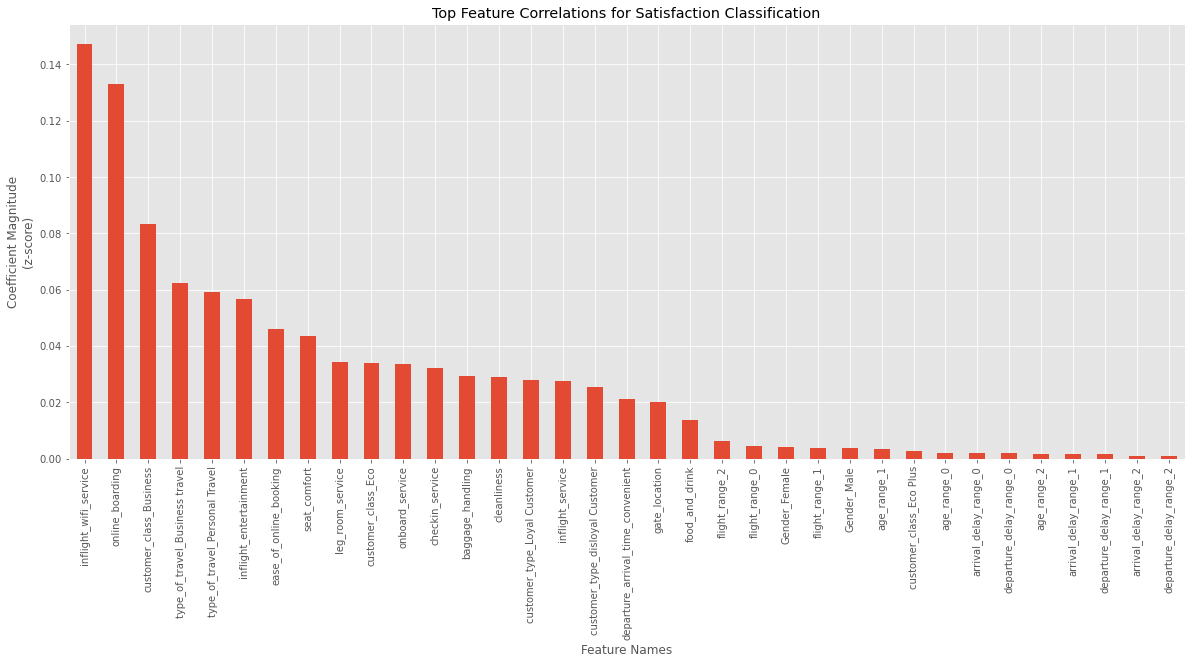

In [55]:
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Satisfaction Classification")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

From the above graph: 3 Important features that contribute to satisfaction
- infight wifi service
- online boarding
- customer_class_business

The features of lower contribution for satisfaction:
- departure/arrival delay range_2 (>90 min)
- arrival/arrival delay range_1 (>30-90min)
- age range 2 (>65 years)

The airliners should mostly concentrate on inflight wifi service and pleasent online boarding as these two are the major contributors for satisfaction.


In [56]:
from sklearn.feature_selection import RFECV
#Create a regression estimator with best parameters for cross validation
rfecv_a = RFECV(estimator=regEstimator_a, step=1, cv=cv, scoring='accuracy')
rfecv_a.fit(X_a_Scl, y_a)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=50,
                                       n_estimators=200, random_state=5),
      scoring='accuracy')

Optimal number of features : 25


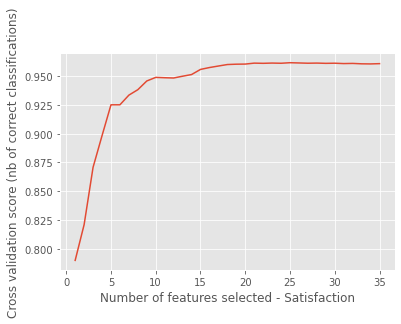

In [57]:
print("Optimal number of features : %d" % rfecv_a.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected - Satisfaction")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_a.grid_scores_) + 1), rfecv_a.grid_scores_)
plt.show()

In [58]:
#Plot the RFE Rankings
plt.style.use('ggplot')
rfe_ft_imp_df_a = pd.DataFrame({'feature_names':airline_df_dummy_satisfied.drop('satisfaction', axis=1).copy().columns, 'weights':rfecv_a.grid_scores_})
rfe_ft_imp_df_a.sort_values(by='weights', inplace=True, ascending=False )
topfeatures_a = rfe_ft_imp_df_a.head(10)
topfeatures_a

,feature_names,weights
24,flight_range_1,0.961602
25,flight_range_2,0.961386
22,customer_class_Eco Plus,0.961293
27,departure_delay_range_1,0.961278
20,customer_class_Business,0.961239
29,arrival_delay_range_0,0.961170
26,departure_delay_range_0,0.961162
23,flight_range_0,0.961131
21,customer_class_Eco,0.961077
28,departure_delay_range_2,0.961054




#### Cleanliness Classification Important features

In [59]:
scaler.fit(X_b)

X_b_Scl = scaler.transform(X_b)

regEstimator_b = RandomForestClassifier(class_weight='balanced',criterion='entropy', max_depth=50, n_estimators=150, random_state=5)
regEstimator_b.fit(X_b_Scl, y_b)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, n_estimators=150, random_state=5)

In [60]:
weights = regEstimator_b.feature_importances_.ravel()
feature_names = airline_df_dummy_clean.drop('clean', axis=1).copy().columns.values                                  
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

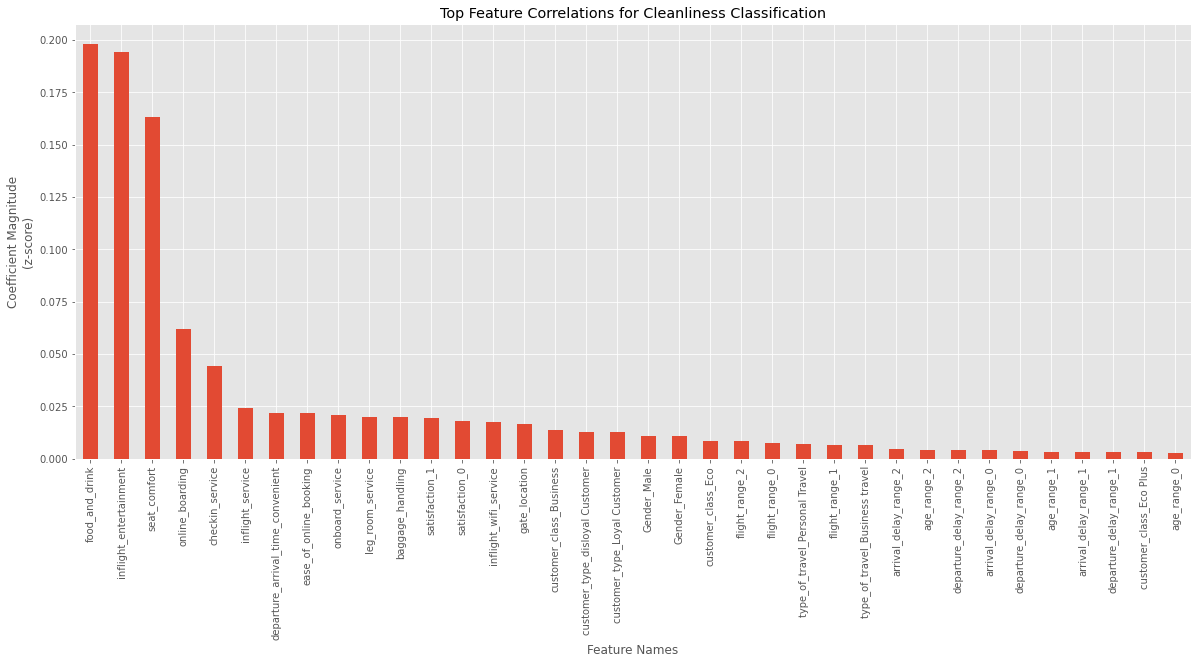

In [61]:
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Cleanliness Classification")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

From the above graph: 3 Important features that contribute to cleanliness
- food and drink
- inflight entertainment
- wifi_comfort

The features of lower contribution for cleanliness:
- age_range 0 (<16 years)
- customer_class_ECO_Plus
- age range 1/2 (16-65 years)

It is interesting to note that all the age ranges does not contribute to cleanliness.


In [62]:
#Create a regression estimator with best parameters for cross validation
rfecv_b = RFECV(estimator=regEstimator_b, step=1, cv=cv, scoring='accuracy')
rfecv_b.fit(X_b_Scl, y_b)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=5, shuffle=True),
      estimator=RandomForestClassifier(class_weight='balanced',
                                       criterion='entropy', max_depth=50,
                                       n_estimators=150, random_state=5),
      scoring='accuracy')

Optimal number of features : 19


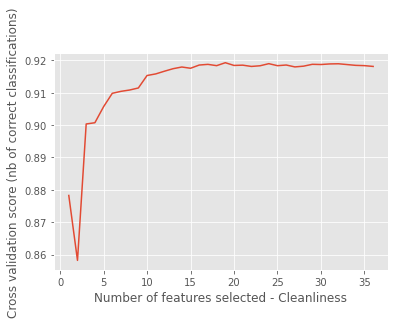

In [63]:
print("Optimal number of features : %d" % rfecv_b.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected - Cleanliness")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_b.grid_scores_) + 1), rfecv_b.grid_scores_)
plt.show()

In [64]:
#Plot the RFE Rankings
plt.style.use('ggplot')
rfe_ft_imp_df_b = pd.DataFrame({'feature_names':airline_df_dummy_clean.drop('clean', axis=1).copy().columns, 'weights':rfecv_b.grid_scores_})
rfe_ft_imp_df_b.sort_values(by='weights', inplace=True, ascending=False )
topfeatures_b = rfe_ft_imp_df_b.head(10)
topfeatures_b

,feature_names,weights
18,type_of_travel_Personal Travel,0.919305
23,flight_range_1,0.919011
31,arrival_delay_range_0,0.918980
30,departure_delay_range_2,0.918926
28,departure_delay_range_0,0.918810
16,customer_type_disloyal Customer,0.918795
29,departure_delay_range_1,0.918749
32,arrival_delay_range_1,0.918733
25,age_range_0,0.918594
15,customer_type_Loyal Customer,0.918586


## 4. Deployment

The models built have proven to be very accurate for predicting flight satisfaction and cleanliness, 95% and 92% respectively.  
Companies that may find this useful would-be airline companies such as United, Southwest, Delta etc.  They could offer surveys to their customers during or after the flight for all the inputs that would not already be in their databases and use these to predict satisfaction or cleanliness.  With the recent events of the pandemic, cleanliness is more important now than ever, while it might be obtuse or in poor taste to ask outright what a customer’s thought on cleanliness of the flight was, using the model based on correlated variables will give the airlines the statistics they need to improve it.

In addition, other vendors could find these models useful.  By referencing the variables that have the highest feature correlation to that of flight satisfaction or cleanliness, vendors can use this info to sell to new technology or services airlines and be part of their supply chain, or other companies specializing in travel accessories can market these directly to consumers.


To deploy the model there are multiple options that would available to the end customer.  Firstly, the full code and all documentation would be placed on a private GitHub to be given to the client.  This can be used or referenced by their development team, auditors etc. or anyone at the customer who needs access to the raw code and full documentation.  There are multiple choices for how the end code can be used by the customer

1. Jupyter notebook: Depending on the python and technical skills of the customers employees, a simple jupyter notebook could be built that would allow the customer to manually upload a CSV or excel file to run predictions on new or existing data.

2. Web app deployment:  If the company is less technically savvy then a webapp using Django/Flask framework can be created to make operational use of the models very easy.  Similar as above, there could be a button that allows manual uploading of excel/csv files or from a database to allow the customer to run the model without any python coding.

3. Python Executable:  If the customer does not want to pay to host a webapp on the cloud, another option would be to create an executable using pyinstaller.  This would function similar to the webapp but would be run locally on the customers desktop and python skills are not needed to run.


While the model is useful and accurate now, there could be external factors such as new technologies, pandemics, competition, etc that could create or change the factors that influence overall flight satisfaction and cleanliness.  When possible data should continuously be collected so the model can be rerun with the latest data for training purposes.  Airline companies can use incentive-based surveys to get all of the ordinal ranking information from their customer base whenever possible.  The original dataset contains ~130K records.  As new datapoints are gathered it is advised to remove the oldest from the dataset and on a quarterly basis rerun the models to be up to date with current trends.


## 5. Exceptional Work:

We have run gridsearchCV for hyper-tuning and selecting the parameters for running all the models.

We have used the Neural network classifier as additional algorithm for evaluationg the accuracy, precision, recall and F1 score.

We have also used RFECV and RFE to identify the optimal number of features for the classifer with highest ROC AUC.


## WIP

## Why we chose to use accuracy, precision and recall as our data measurement

## Answer bottom three questions(ROC Curve, pair t test and attributes weight analysis)

## PCA to 23 in both codes.